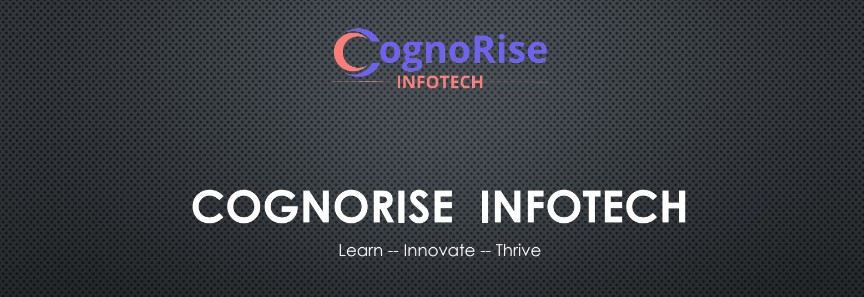

# TASK 02 :- 80 CEREALS DATA ANALYSIS






# INTRODUCTION ABOUT CEREALS

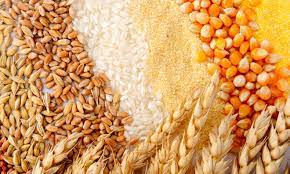


 #### * Cereals have played an essential role in the development of human civilization and have been cultivated for nearly ten thousand years. 

#### * A cereal is any cultivated grass grown for the edible components of its grain and can also refer to the resulting grain itself. 

#### * The edible components of cereal grain are the endosperm, germ, and bran. 

#### * Unprocessed grains have high nutritional content and are a rich source of vitamins, minerals, carbohydrates, fats, oils, and protein. 

#### * The bran and germ are often removed in processed cereal products and the endosperm is composed of mostly carbohydrates. 

#### * Cereal grains can be used for human food, animal feed, biodiesel, and as a starch source for conversion into fermentable sugars.

#### * Cereals are grown in greater quantities and provide more food energy worldwide than any other type of crop. 

#### * The long shelf life, high caloric content, and nutritional composition of grains makes them an ideal food source, especially in impoverished and developing countries.

#### * The most widely produced cereal crops worldwide are maize, wheat, rice, barley, and sorghum.

#### * Many types of cereals are adaptable to different climates and growing conditions and others are specific to certain parts of the world.

#### * Barley in particular is known for being versatile and adaptable to unfavorable climate and soil conditions.  It is a top source of animal feed for cattle and has superior properties for malting and brewing.

#### * Barley flour is used in many types of foods, such as stews, soups, pastas, noodles, sauces, and baked products.

#### * One important processed product made from cereal grains is breakfast cereals, which have gained popularity as a ready-to-eat food that is being repositioned as not only a breakfast food but as a snack or dessert in cereal bar food. 


# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#  2.Import Dataset

In [2]:
Cereal_data = pd.read_csv('cereal.csv')
Cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
df=pd.DataFrame(Cereal_data)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Data Pre_Processing
  
  ## 1. Data Cleaning

In [4]:
df.shape

# This is used to get the dimensions of a DataFrame in terms of its number of rows and columns.
#form (number_of_rows, number_of_columns).

(77, 16)

In [5]:
Cereal_data.isna().sum()

#This is used to check for missing values in each column of the DataFrame 
#and returns the count of missing values for each column.

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
Cereal_data.dtypes

#This is used to retrieve the data types of each column in the DataFrame 

#This information can be helpful for understanding the nature of the data in each column, 
#especially when you're working with datasets of various types.

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [7]:
header=df.columns
print(header)     

#This is used to retrieve the column names of a DataFrame df and store them in a variable named header.

#Here's a breakdown:

# 1. df.columns: This attribute is used to get the column labels (names) of the DataFrame df.

# 2. header = df.columns: This line assigns the column names to the variable header.

# 3. print(header): This line prints the content of the header variable, which contains the column names.

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


In [8]:
df.nunique()

#This is used to get the number of unique values in each column of a DataFrame df. 

#It returns a Series where the index corresponds to the column names,
#and the values represent the number of unique values in each column.

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [9]:
df.info()

# It provides information about the DataFrame, including the data types of each column, the number of non-null values,
#and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [10]:
df.describe()

#it will generate descriptive statistics of the numerical columns in that DataFrame.

# 1. count: Number of non-null values in each column.

# 2. mean: Mean (average) of each column.

# 3. std: Standard deviation, a measure of the amount of variation or dispersion.

# 4. min: Minimum value in each column.

# 5. 25%: 25th percentile (first quartile) - the value below which 25% of the data falls.

# 6. 50%: 50th percentile (second quartile or median) - the value below which 50% of the data falls.

# 7. 75%: 75th percentile (third quartile) - the value below which 75% of the data falls.

# 8. max: Maximum value in each column.

#These statistics provide a quick overview of the distribution of values in your numerical columns, 
#helping you understand the central tendency, spread, and range of your data.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [11]:
df[df['carbo'] <0]

#is used to filter rows in a DataFrame df where the values in the 'carbo' column are less than 0. 
#This is a common operation in pandas for filtering rows based on a condition.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [12]:
df[df['potass']<0]

#is used to filter rows in a DataFrame df where the values in the 'potass' column are less than 0.
#This is a common operation in pandas for filtering rows based on a condition.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816


In [13]:
df[df['sugars']<0]

#is used to filter rows in a DataFrame df where the values in the 'sugars' column are less than 0. 
#This is a common operation in pandas for filtering rows based on a condition.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [14]:
df[df['fiber']==14]

#The code df[df['fiber']==14] is used to filter rows in a DataFrame df where the values in the 'fiber' column are equal to 14. 
#This is a common operation in pandas for selecting specific rows based on a condition.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [15]:
Cereal_data=df.values
#Cereal_data = df.values: This line extracts the values of the DataFrame df and assigns them to the variable Cereal_data.
#The result is a NumPy array.

Cereal_data=list(Cereal_data)
#Cereal_data = list(Cereal_data): This line converts the NumPy array Cereal_data into a Python list. 
#Each row of the original DataFrame becomes a nested list within the new list.

In [16]:
#The pop() method in Python is used to remove an item at the specified index and return it.

Cereal_data.pop(4)    # Removes the element at index 4
Cereal_data.pop(19)   # Removes the element at index 19
Cereal_data.pop(55)   # Removes the element at index 55

#removing the outlier row:
Cereal_data.pop(3)

array(['All-Bran with Extra Fiber', 'K', 'C', 50, 4, 0, 140, 14.0, 8.0, 0,
       330, 25, 3, 1.0, 0.5, 93.704912], dtype=object)

In [17]:
df_new=pd.DataFrame(Cereal_data)
# pd.DataFrame(Cereal_data): This creates a new DataFrame (df_new) from the list Cereal_data. 
# Each inner list in Cereal_data becomes a row in the new DataFrame.

df_new.columns=header
# df_new.columns = header: This assigns the column names from the list header to the columns of the DataFrame df_new.

df_new.head()
# df_new.head(): This displays the first few rows of the new DataFrame to check its structure.


# Make sure that the length of header matches the number of columns in your Cereal_data. 
# If they don't match, you might encounter an error.

# Here's an example assuming Cereal_data has three columns and header has three column names:

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
4,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094


In [18]:
df_new.describe()

#If you want to generate descriptive statistics for the numerical columns in the new DataFrame df_new, 
#you can use the describe() method, just like you did with the original DataFrame.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,107.808219,2.493151,1.013699,162.671233,2.013699,14.821918,7.205479,95.342466,29.109589,2.205479,1.031233,0.826027,41.668593
std,18.800604,1.068791,1.006826,83.300336,1.996477,3.836385,4.307483,65.871976,22.443486,0.832648,0.154434,0.234259,12.750710
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.207582
50%,110.000000,2.000000,1.000000,180.000000,2.000000,15.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.105965
75%,110.000000,3.000000,1.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,49.787445
max,160.000000,6.000000,5.000000,320.000000,10.000000,23.000000,15.000000,320.000000,100.000000,3.000000,1.500000,1.500000,74.472949


In [19]:
df_new.shape

#The df_new.shape attribute is used to retrieve the dimensions of the DataFrame df_new. 
#It returns the number of rows and columns in the DataFrame.

(73, 16)

In [20]:
df_new[df_new.duplicated()==True]

# This is used to identify and retrieve rows in the DataFrame df_new that are duplicates based on all columns.

# df_new.duplicated(): This method returns a boolean Series indicating whether each row is a duplicate or not. 
# If a row is a duplicate of a previous row, the corresponding value in the Series is True; otherwise, it's False.

# df_new[df_new.duplicated()==True]: This filters the DataFrame to include only those rows where 
# the condition (rows that are duplicates) is True.

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


In [21]:
df.isna().sum()

# This is used to check for missing values in each column of the DataFrame df and return the count of missing values for each column

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# 2. Exploratory Data Analysis [EDA]

# MATPLOTLIB LIBRARY

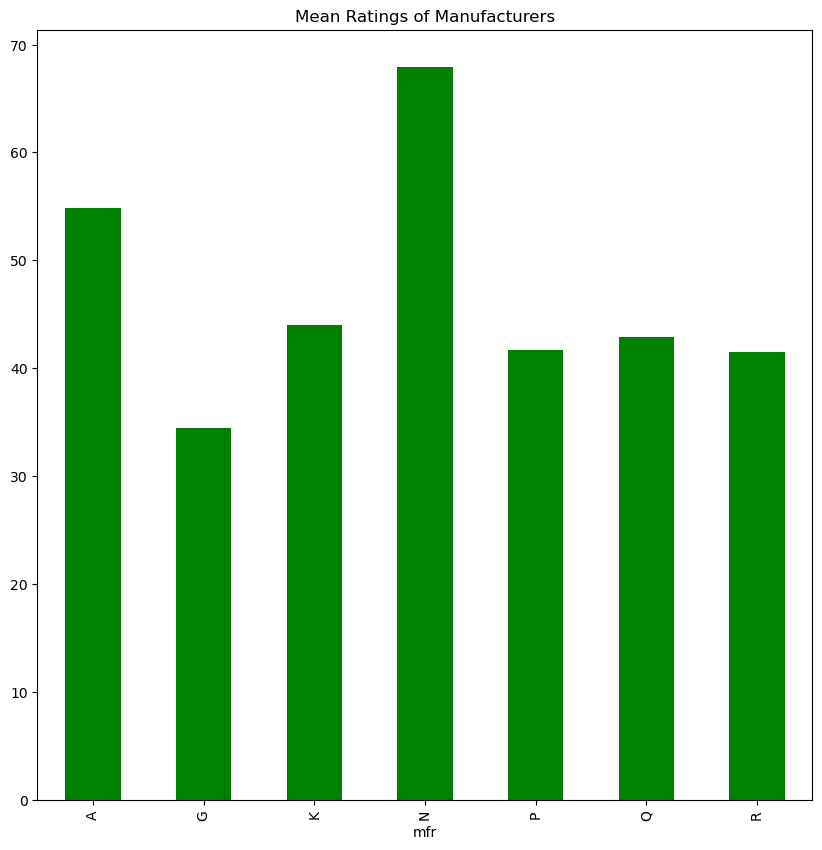

In [22]:
# Here we using the matplotlib library to create a bar plot that 
# -shows the mean ratings of manufacturers based on the 'rating' column in your DataFrame (df).

plt.figure(figsize=(10,10))

# plt.figure(figsize=(10, 10)): Sets the figure size to 10x10 inches.

df.groupby('mfr')['rating'].mean().plot.bar(color='g')

# df.groupby('mfr')['rating'].mean(): Groups the DataFrame by the 'mfr' column (manufacturer) and 
# -calculates the mean of the 'rating' column for each group.

# .plot.bar(color='g'): Plots the mean ratings as a bar plot, using green color ('g'). here we can give any colour

plt.title('Mean Ratings of Manufacturers')

# plt.title('Mean Ratings of Manufacturers'): Adds a title to the plot.

plt.show()

# plt.show(): Displays the plot.



In [23]:
#This is used to count the occurrences of each unique value in the 'type' column of the DataFrame df_new. 
#This is a common operation in pandas to understand the distribution of categorical data.

df_new.type.value_counts()
# df_new['type'] This extracts the 'type' column from the DataFrame df_new.

# .value_counts(): This method counts the occurrences (Appears or repeated) of each unique value in the specified column.

C    72
H     1
Name: type, dtype: int64

In [24]:
# The code df_new.drop(["name", "mfr", "type", "cups"], axis='columns', inplace=True) 
# is using the drop method in pandas to remove specified columns from the DataFrame df_new

df_new.drop(["name","mfr","type","cups"],axis='columns',inplace=True)

#df_new : This DataFrame using  which you want to drop columns.

# drop(["name", "mfr", "type", "cups"], axis='columns'): This specifies the columns you want to drop. 
# In this case, the columns "name", "mfr", "type", and "cups" are specified.

# axis='columns': Indicates that you are referring to columns. Alternatively, you can use axis=1 for the same effect.

# inplace=True: Modifies the DataFrame in place, meaning it changes the original DataFrame instead of creating a new one.

# After executing this code, the DataFrame df_new will no longer have the specified columns.

In [25]:
df_new.head()

#If you want to display the first few rows of the modified DataFrame df_new after dropping certain columns,
# you can use the head() method.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,1,1.0,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,2,1.0,33.174094


In [26]:
df_new.shape

#If you want to check the dimensions(number of rows and columns)of the modified DataFrame df_new after dropping certain columns,
# you can use the shape attribute

(73, 12)

# HEATMAP

### Here we creating a HEATMAP to visualize the correlation matrix of the remaining columns in the DataFrame df_new.


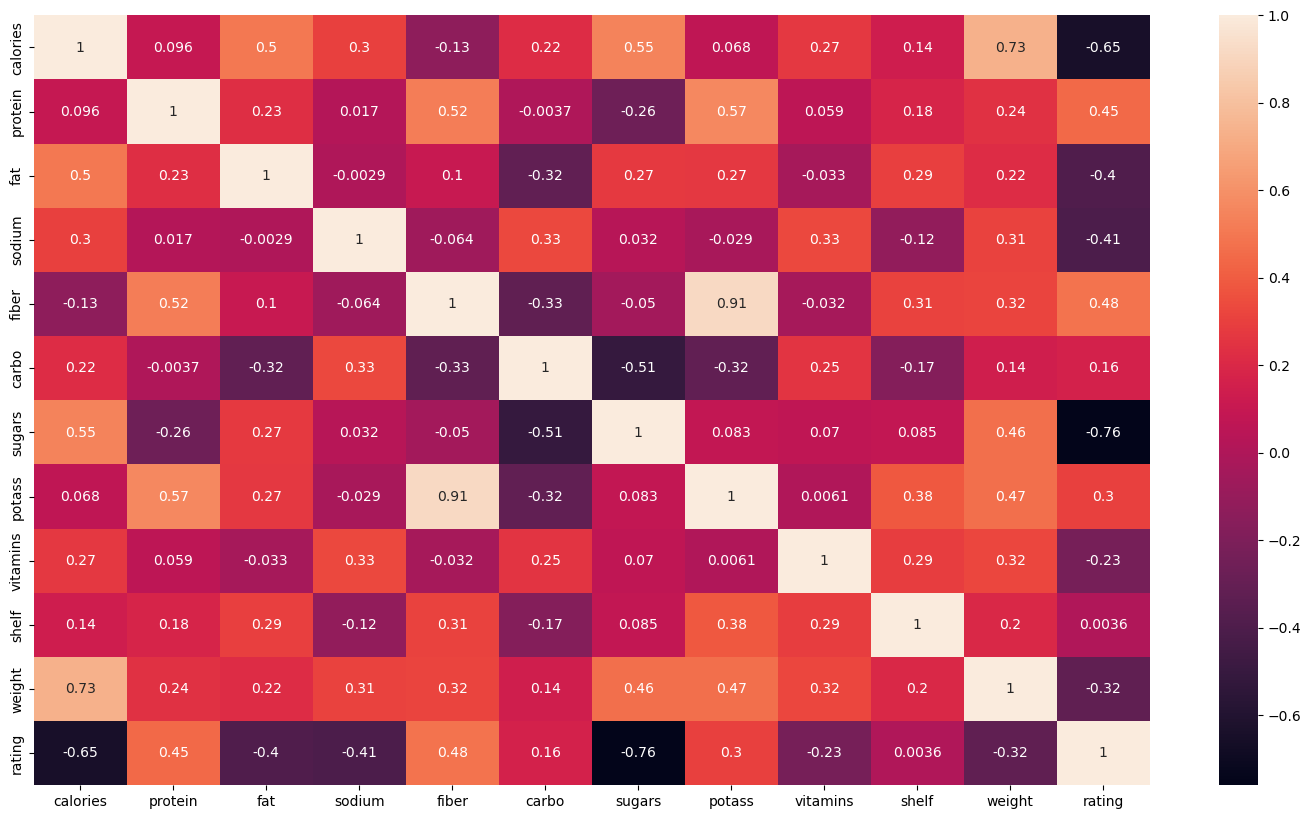

In [27]:
corr_mat=df_new.corr()
# df_new.corr() : Calculates the correlation between the numeric columns in the DataFrame df_new. 
# The result is a correlation matrix (corr_mat -co-relation matrics).

mat=corr_mat.values
# mat=corr_mat.values() : this is shows the co-relation matrics values

plt.figure(figsize=(18,10))
# plt.figure(figsize=(18, 10)) : Sets the size of the figure that will contain the heatmap.


# sn.heatmap(corr_mat, annot=True): Uses SEABORN (sn) to create a heatmap of the correlation matrix

sn.heatmap(corr_mat, annot=True)
# The annot=True parameter adds numeric annotations to the heatmap, showing the correlation values.

plt.show()
# plt.show(): Displays the heatmap

# NOTE :- This code is useful for visualizing the correlation between different numeric columns in your DataFrame. 
# The colors and values in the heatmap provide insights into the strength and direction of the relationships between variables. 
# Adjustments can be made based on your specific DataFrame and visualization preferences.


In [28]:
# The code df_new.drop(["weight"], axis='columns', inplace=True) this is using the drop method to remove the "weight" column 
# from the DataFrame df_new.

df_new.drop(["weight"],axis='columns',inplace=True)

#df_new: The DataFrame from which you want to drop a column.

# .drop(["weight"], axis='columns'): This specifies the column you want to drop. In this case, the column "weight" is specified.

# axis='columns': Indicates that you are referring to columns. Alternatively, you can use axis=1 for the same effect.

# inplace=True: Modifies the DataFrame in place, meaning it changes the original DataFrame instead of creating a new one.

# After executing this code, the DataFrame df_new will no longer have the "weight" column.


# PIE CHART

### This is creating a pie chart to visualize the distribution of values in the 'shelf' column of the original DataFrame df.

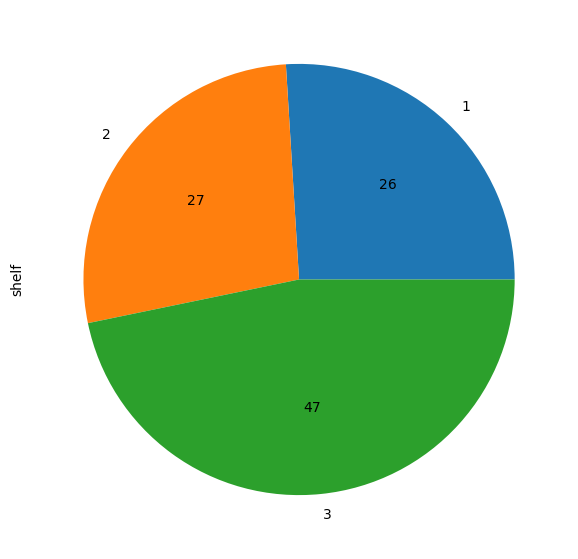

In [29]:
plt.figure(figsize=(7,7))
# plt.figure(figsize=(7, 7)) : Sets the size of the figure that will contain the pie chart.

df.groupby('shelf')['shelf'].count().plot.pie(autopct = '%2.0f')

# df.groupby('shelf')['shelf'].count() : Groups the DataFrame df by the 'shelf' column and counts the occurrences of each unique value
# .plot.pie(autopct='%2.0f'): Creates a pie chart using the counted values. 
# The autopct parameter adds percentage labels to each wedge, formatted as integers.

plt.show()
# plt.show(): Displays the pie chart.

# NOTE :- This pie chart is useful for visually representing the proportion of each unique value in the 'shelf' column.
# Adjustments can be made based on your specific DataFrame and visualization preferences.


In [30]:
df_new.head()

#If you want to display the first few rows of the modified DataFrame df_new after dropping certain columns,
# you can use the head() method.

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,59.425505
3,110,2,2,180,1.5,10.5,10,70,25,1,29.509541
4,110,2,0,125,1.0,11.0,14,30,25,2,33.174094


# SCATTER PLOT

### This is creating a scatter plot with a regression line to visualize the relationship between the  "sugars" and 

### "rating" columns in the DataFrame df_new


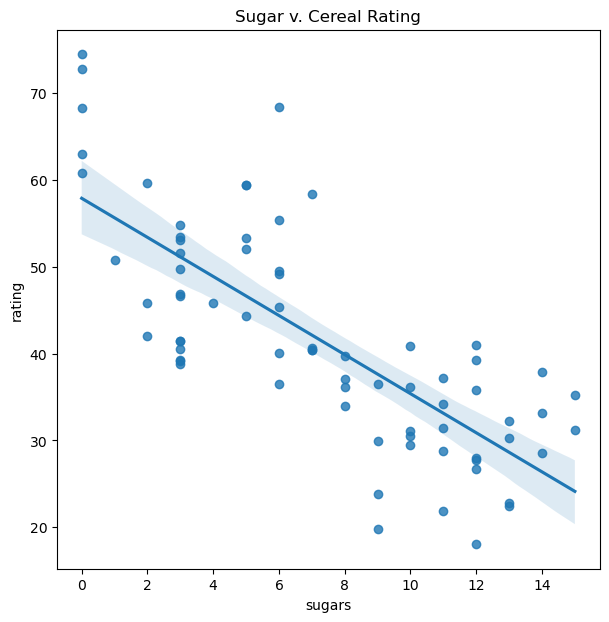

In [31]:
# This is creating a scatter plot with a regression line to visualize the relationship between the 
# "sugars" and "rating" columns in the DataFrame df_new

y_rating=df_new["rating"]
# y_rating = df_new["rating"] : Assigns the values in the "rating" column to the variable y_rating.

x_sugar=df_new["sugars"]
# x_sugar = df_new["sugars"]: Assigns the values in the "sugars" column to the variable x_sugar.

plt.figure(figsize=(7,7))
# plt.figure(figsize=(7, 7)): Sets the size of the figure that will contain the scatter plot.

sn.regplot(x=x_sugar,y=y_rating)
# sn.regplot(x=x_sugar, y=y_rating) : Creates a scatter plot with a regression line showing the relationship between 
# "sugars" and "rating".

plt.title('Sugar v. Cereal Rating')
# plt.title('Sugar v. Cereal Rating'): Adds a title to the plot.

plt.show()
# plt.show(): Displays the scatter plot.


# NOTE :- This scatter plot with a regression line helps visualize the trend or correlation between sugar content and 
# cereal rating. The regression line represents the best-fit line through the data points, 
# indicating the general trend in the relationship between the two variables.